In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 8
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvc2ZvdWNoZXIvREVWL1RyYWl0ZW1lbnRJbWFnZXNQeXRob25Wb2wx'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/tmp/ipykernel_9278/2500174000.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/home/sfoucher/miniconda3/lib/python3.10/importlib/_bootstrap.py": 1733934987.5750644, "/home/sfoucher/miniconda3/lib/python3.10/importlib/_bootstrap_external.py": 1733934987.5750644, "/home/sfoucher/miniconda3/lib/python3.10/codecs.py": 1733934987.0790741, "/home/sfoucher/miniconda3/lib/python3.10/encodings/aliases.py": 1733934987.3590686, "/home/sfoucher/miniconda3/lib/python3.10/encodings/__init__.py": 1733934987.4150677, "/home/sfoucher/miniconda3/lib/python3.10/encodings/utf_8.py": 1733934987.4670665, "/home/sfoucher/miniconda3/lib/python3.10/abc.py": 1733934987.0590746, "/home/sfoucher/miniconda3/lib/python3.10/io.py": 1733934987.1190734, "/home/sfoucher/miniconda3/lib/python3.10/stat.py": 1733934987.1790721, "/home/sfoucher/miniconda3/lib/python3.10/_collections_abc.py": 1733934987.0790741, "/home/sfoucher/miniconda3/lib/python3.10/genericpath.py": 1733934987.1030736, "/home/sfoucher/miniconda3/lib/python3.10/posixpath.py": 1733934987.1470728, "/home/sfoucher/miniconda3/lib/py

In [2]:
#| eval: false
!apt-get update
!apt-get install gdal-bin libgdal-dev
!pip install -q rioxarray

In [3]:
import numpy as np
import rioxarray as rxr
from scipy import signal
import xarray as xr
import xrscipy
import matplotlib.pyplot as plt

In [4]:
#| eval: false
import gdown

gdown.download('https://drive.google.com/uc?export=download&confirm=pbef&id=1a6Ypg0g1Oy4AJt9XWKWfnR12NW1XhNg_', output= 'RGBNIR_of_S2A.tif')
gdown.download('https://drive.google.com/uc?export=download&confirm=pbef&id=1a4PQ68Ru8zBphbQ22j0sgJ4D2quw-Wo6', output= 'landsat7.tif')
gdown.download('https://drive.google.com/uc?export=download&confirm=pbef&id=1_zwCLN-x7XJcNHJCH6Z8upEdUXtVtvs1', output= 'berkeley.jpg')
!wget https://raw.githubusercontent.com/sfoucher/TraitementImagesPythonVol1/refs/heads/main/images/modis-aqua.PNG -O modis-aqua.PNG

In [5]:
#| output: false

with rxr.open_rasterio('berkeley.jpg', mask_and_scale= True) as img_rgb:
    print(img_rgb)
with rxr.open_rasterio('RGBNIR_of_S2A.tif', mask_and_scale= True) as img_rgbnir:
    print(img_rgbnir)

/home/sfoucher/miniconda3/lib/python3.10/site-packages/rioxarray/_io.py:1143: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.



<xarray.DataArray (band: 3, y: 771, x: 1311)> Size: 12MB
[3032343 values with dtype=float32]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 10kB 0.5 1.5 2.5 ... 1.308e+03 1.31e+03 1.31e+03
  * y            (y) float64 6kB 0.5 1.5 2.5 3.5 4.5 ... 767.5 768.5 769.5 770.5
    spatial_ref  int64 8B 0


<xarray.DataArray (band: 4, y: 1926, x: 2074)> Size: 64MB
[15978096 values with dtype=float32]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 17kB 7.318e+05 7.318e+05 ... 7.525e+05 7.525e+05
  * y            (y) float64 15kB 5.041e+06 5.041e+06 ... 5.022e+06 5.022e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_IMAGEDESCRIPTION:  subset_RGBNIR_of_S2A_MSIL2A_20240625T153941_N0...
    TIFFTAG_XRESOLUTION:       1
    TIFFTAG_YRESOLUTION:       1
    TIFFTAG_RESOLUTIONUNIT:    1 (unitless)
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        15104
    STATISTICS_MEAN:           1426.6252674912
    STATISTICS_MINIMUM:        86
    STATISTICS_STDDEV:         306.56427126942
    STATISTICS_VALID_PERCENT:  100


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


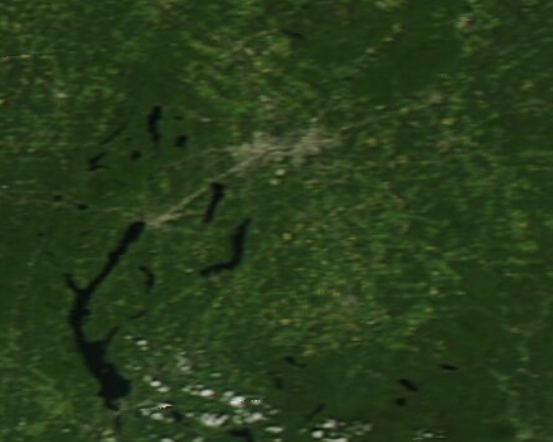

In [6]:
#| lst-label: lst-lecture-PIL-PNG
#| lst-cap: Lecture d'une image en format PNG avec PIL

from PIL import Image
img = Image.open('modis-aqua.PNG')
img

In [7]:
#| lst-label: lst-lecture-opencv-PNG
#| lst-cap: Lecture d'une image en format PNG avec OpenCV

import cv2
img = cv2.imread('modis-aqua.PNG')
img

array([[[17, 50, 33],
        [15, 49, 31],
        [14, 48, 30],
        ...,
        [23, 56, 36],
        [23, 55, 36],
        [22, 55, 36]],

       [[18, 51, 34],
        [16, 50, 32],
        [15, 49, 32],
        ...,
        [27, 59, 40],
        [28, 60, 41],
        [27, 60, 41]],

       [[18, 53, 35],
        [18, 52, 34],
        [18, 51, 34],
        ...,
        [31, 64, 44],
        [34, 66, 47],
        [33, 65, 46]],

       ...,

       [[34, 74, 48],
        [35, 73, 48],
        [34, 70, 46],
        ...,
        [41, 74, 54],
        [41, 73, 54],
        [41, 73, 54]],

       [[36, 76, 50],
        [36, 74, 49],
        [35, 71, 47],
        ...,
        [37, 70, 51],
        [38, 71, 51],
        [38, 71, 51]],

       [[36, 76, 50],
        [35, 73, 48],
        [33, 69, 45],
        ...,
        [31, 63, 44],
        [33, 65, 46],
        [33, 66, 46]]], dtype=uint8)

In [8]:
#| lst-label: lst-lecturerasterioPNG
#| lst-cap: Lecture d'une image en format PNG avec OpenCV

import rasterio
img= rasterio.open('modis-aqua.PNG')
img

/home/sfoucher/miniconda3/lib/python3.10/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.



<open DatasetReader name='modis-aqua.PNG' mode='r'>

In [9]:
#| lst-label: lst-gdalinfo
#| lst-cap: Collecte d'information sur une image avec gdal

!gdalinfo RGBNIR_of_S2A.tif

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Driver: GTiff/GeoTIFF
Files: RGBNIR_of_S2A.tif
       RGBNIR_of_S2A.tif.aux.xml
Size is 2074, 1926


Coordinate System is:
PROJCS["WGS 84 / UTM zone 18N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-75],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32618"]]
Origin = (731780.000000000000000,5040800.000000000000000)
Pixel Size = (10.000000000000000,-10.000000000000000)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_IMAGEDESCRIPTION=subset_RGBNIR_of_S2A_MSIL2A_20240625T153

In [10]:
#| lst-label: lst-rioinfo
#| lst-cap: Collecte d'information sur une image avec rasterio
#| eval: false
!rio info RGBNIR_of_S2A.tif --indent 2 --verbose

In [11]:
#| lst-label: lst-numpyshape
#| lst-cap: Lecture d'une image en format PNG avec OpenCV

import cv2
img = cv2.imread('modis-aqua.PNG')
print('Nombre de dimensions: ',img.ndim)
print('Dimensions de la matrice: ',img.shape)
print('Type de la donnée: ',img.dtype)

Nombre de dimensions:  3
Dimensions de la matrice:  (442, 553, 3)
Type de la donnée:  uint8


In [12]:
#| label: tbl-numpytype
#| tbl-cap: Type de données de NumPy
#| echo: false

from IPython.display import Markdown
from tabulate import tabulate
table = [["uint8", "char", 8, 0, 255],
        ["int8", "signed char", 8, -127, +128],
        ["uint16", "unsigned short", 16, 0, -32768, +32767],
        ["int16", "short", 16, 0, 655355]]
Markdown(tabulate(table, headers=["dtype", "Nom", "Taille (bits)", "Min", "Max"], tablefmt="pipe"))

| dtype   | Nom            |   Taille (bits) |   Min |    Max |
|:--------|:---------------|----------------:|------:|-------:|
| uint8   | char           |               8 |     0 |    255 |
| int8    | signed char    |               8 |  -127 |    128 |
| uint16  | unsigned short |              16 |     0 | -32768 |
| int16   | short          |              16 |     0 | 655355 |

In [13]:
import cv2
img = cv2.imread('modis-aqua.PNG')
img_col = img[:,1,:]
print('Nombre de dimensions: ',img_col.ndim)
print('Dimensions de la matrice: ',img_col.shape)

Nombre de dimensions:  2
Dimensions de la matrice:  (442, 3)
